In [8]:
import numpy as np
from matplotlib import pyplot as plt

with open("input.txt", 'r') as f:
    coordinates = [(l.strip().split(',')) for l in f]
    coordinates = [(int(x[0]), int(x[1])) for x in coordinates]
    
num_points = len(coordinates)

In [2]:
x = np.array([c[0] for c in coordinates])
y = np.array([c[1] for c in coordinates])

In [3]:
x_distances = np.abs(x[:, None] - x)
y_distances = np.abs(y[:, None] - y)

In [4]:
distances_table = x_distances + y_distances

# Find distances of closest points for each point

np.fill_diagonal(distances_table, np.max(distances_table))
print (np.shape(distances_table))
closest_distances_between_points = np.min(distances_table, 1)

# Find the maximum possible distance from another point so that we can create the smallest
# possible grid without accidentally cutting into another point's space
max_distance = np.max(closest_distances_between_points)

(50, 50)


In [5]:
#Create mesh of grid of cells
# Let X = max(x coordinates) + max_distance, where max_distance is defined above. Same with Y
grid_mesh = np.meshgrid(np.arange(np.max(x)+max_distance),
                       np.arange(np.max(y)+max_distance))

x_point_dist = np.abs(grid_mesh[0][:,:,None]-x)
y_point_dist = np.abs(grid_mesh[1][:,:,None]-y)

In [6]:
# Table of manhattan distance of every cell from every point
# This is a MASSIVE 3-DIMENSIONAL ARRAY. 
# Shape is (X, Y, num_points)
xy_point_dist = x_point_dist + y_point_dist

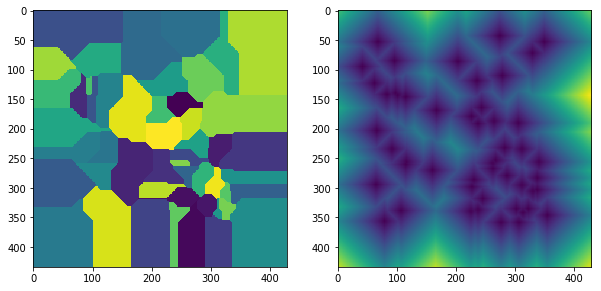

In [7]:
# Map of the idx of the closest point at every cell on the grid
closest_points_map = np.argmin(xy_point_dist,2)

# MAp of the closest distance to any point for a cell on the grid
closest_distances_map = np.min(xy_point_dist, 2)

plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(closest_points_map)
plt.subplot(122)
plt.imshow(closest_distances_map)
plt.show()

In [9]:
# Here's where shit goes through the fan
# First I do this crazy thing of tiling the closest distances so that it matches the shape of
# the xy_point_dist massive array from earlier
tiled_closest_distances = np.tile(closest_distances_map[:,:,None], (1,1,num_points))

# This allows me to find which point or points had equal CLOSEST distances
closest_point_mask = np.equal(tiled_closest_distances, xy_point_dist).astype(int)

# And so I can create a map of number of points with closest distance for every cell
# I can use this to filter out those points later
num_closest_points_map = np.sum(closest_point_mask, 2)

In [10]:
# And now I can find out the points with the largest area
# Create storage for valid areas
valid_areas = np.zeros((50))
for point in range(len(coordinates)):
    # Create mask
    mask = np.zeros_like(closest_points_map)
    
    # Fill in the mask where current point is the owner of the space
    mask[closest_points_map==point] = 1
    
    # If several points share the same space, remove it from the mask
    mask[num_closest_points_map!=1] = 0
    
    # And sum it up. Woohoo
    area = np.sum(mask)
    
    # Then filter out the points that would have infinite areas 
    # because they own cells at the edges of the grid
    if np.sum(mask[0,:]) > 0 or np.sum(mask[:,0]) > 0:
        area = 0
    if np.sum(mask[-1,:]) > 0 or np.sum(mask[:,-1]) > 0:
        area = 0
    valid_areas[point] = area

In [11]:
valid_areas

array([1533.,    0., 1284.,  981., 1641., 5472., 1294., 2236.,    0.,
          0.,    0.,  406.,    0.,  406.,    0.,    0.,  822.,    0.,
          0., 1772.,    0.,    0., 3118., 1789.,    0.,    0.,  276.,
       2797., 1485.,    0., 3743.,    0., 1414.,    0., 1490.,  320.,
        418.,    0., 3903.,  693.,  286.,    0.,    0.,    0., 1526.,
       1462.,    0., 5532., 1028., 2686.])

In [12]:
# BOOM, WE GET THE ANSWERRRR
print (np.max(valid_areas))

5532.0


In [15]:
# Lol, second part was easy after the first part so I didn't bother naming stuff sensibly

sum_point_dist = np.sum(xy_point_dist,2)
a = np.zeros_like(sum_point_dist)
a[sum_point_dist<10000] = 1
print (np.sum(a))

36216
